# Artificial Inteligence Computer Assignment NO.3
## Mohammad Mahdi Ebrahim Soltani
### Student Id: 810100241

In [6]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 515s 9us/step


### Preprocessing our image datas:

In [7]:
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

### Feature Extraction:

In [9]:
import os
import numpy as np
import pandas as pd
# for collab add /content/drive/My Drive
image_folder = 'flower_images'
labels_df = pd.read_csv(image_folder+'/' + 'flower_labels.csv')
true_labels = labels_df['label']
feature_vectors = []

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        img_path = os.path.join(image_folder, filename)
        img_array = preprocess_image(img_path)
        features = base_model.predict(np.expand_dims(img_array, axis=0))
        feature_vectors.append(features.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### Using K-Means an DBScan to cluster our features

#### using PCA to redduce dimensions and remove garbage values from garbage dimensions:

In [10]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(feature_vectors)

#### K-Means:

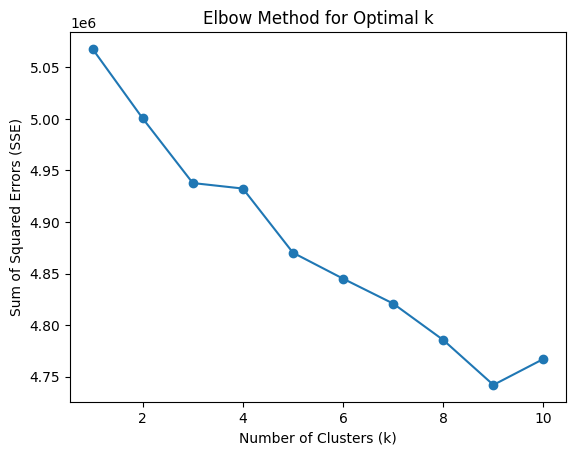

k:  10


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.DataFrame(feature_vectors)
scaled_df = StandardScaler().fit_transform(df)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=7, n_init=20)
print('k: ', k)
kmeans.fit(reduced_features)
cluster_labels_kmeans = kmeans.labels_

#### DBScan:

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=180, min_samples=2)

feature_array = np.array(reduced_features)

scaler = StandardScaler()
standardized_features = scaler.fit_transform(feature_array)

dbscan.fit(standardized_features)

cluster_labels_dbscan = dbscan.fit_predict(reduced_features)

### Plotting the clusters:



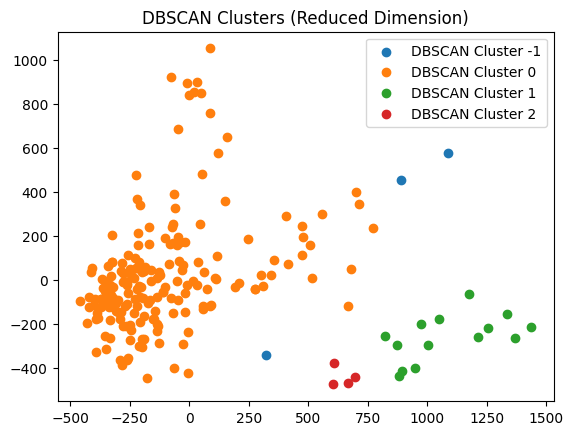

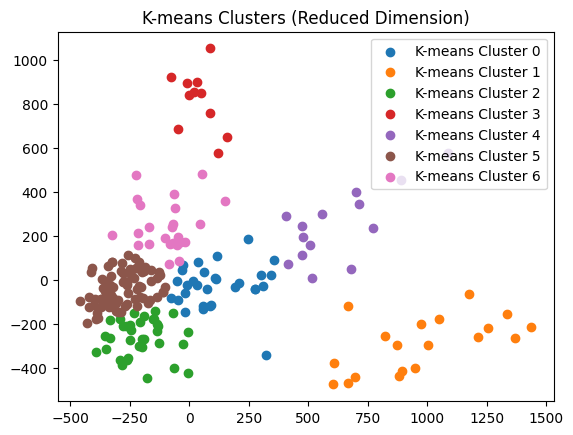

In [38]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

for label in np.unique(cluster_labels_dbscan):
    cluster_indices = np.where(cluster_labels_dbscan == label)[0]
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1], label=f'DBSCAN Cluster {label}')

plt.title('DBSCAN Clusters (Reduced Dimension)')
plt.legend()
plt.show()

for label in np.unique(cluster_labels_kmeans):
    cluster_indices = np.where(cluster_labels_kmeans == label)[0]
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1], label=f'K-means Cluster {label}')

plt.title('K-means Clusters (Reduced Dimension)')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import silhouette_score, homogeneity_score
import numpy as np
silhouette = silhouette_score(feature_array.reshape(feature_array.shape[0], -1), cluster_labels_kmeans)
print('Silhouette score for k-means: ', silhouette)
homogeneity = homogeneity_score(true_labels, cluster_labels_kmeans)
print('homogeneity score for k-means: ', silhouette)

silhouette_dbscan = silhouette_score(feature_array.reshape(feature_array.shape[0], -1), cluster_labels_dbscan)
print('Silhouette score for dbscan: ', silhouette_dbscan)
homogeneity_dbscan = homogeneity_score(true_labels, cluster_labels_dbscan)
print('homogeneity score for dbscan: ', silhouette_dbscan)

Silhouette score for k-means:  0.4037377969416711
homogeneity score for k-means:  0.4037377969416711
Silhouette score for dbscan:  0.48179046277405685
homogeneity score for dbscan:  0.48179046277405685


## Questions:


### Q1:
Image feature extraction plays a crucial role in computer vision and image processing. Why we extract features rather than merely reading the raw pixel values:


*   **Higher-Level Information**: Feature extraction involves identifying and representing distinctive structures within an image
*   **Compact and Informative**: Features provide a compact representation of an image. Instead of dealing with every pixel, we focus on relevant characteristics
*   **Noise Reduction**: Feature extraction methods (such as edge detection or corner detection) help filter out noise and emphasize meaningful patterns.
*   **Downstream Tasks**: Object detection, Classification, Clustering.
*   **Efficiency and Performance**: Extracting features allows us to work with higher-level abstractions rather than pixel-level details.


### Q2:
1.   **Grayscale Pixel Values as Features**:
In grayscale images, each pixel corresponds to a single intensity value (ranging from 0 to 255). These pixel values can be treated as features for various tasks like classification, clustering, or regression.
2. **Histogram of Oriented Gradients (HOG)**:
HOG is widely used for object detection and human detection. It computes histograms of gradient orientations in local image patches.
3. **Principal Component Analysis (PCA)**:
PCA is a dimensionality reduction technique that identifies the most important features (principal components) in an image.


### Q3:
In our case, the preprocess is resizing the pictures to match the models size preference, normalizing the data, converting `RGB` t0 `BGR`, zero-centring and scaling. excluding the risizing, all the others are done with `preprocess_input`method from VGG16 library.


### Q4:

### K-Means Clustering

#### Advantages:
1. **Easy to Understand and Implement**:
   - K-Means is straightforward to grasp and apply.
   - It serves as a good starting point for beginners.

2. **Scalability**:
   - K-Means can handle **large datasets** efficiently.
   - Its computational complexity is reasonable.

#### Disadvantages:
1. **Sensitive to Cluster Count**:
   - The choice of the number of clusters (centroids) significantly impacts K-Means.
   - Techniques like the **Elbow method** help, but generating optimal clusters can still be challenging.

2. **Outlier Sensitivity**:
   - K-Means is **not robust to outliers**.
   - Outliers can drag centroids, leading to skewed clusters.

3. **High-Dimensional Spaces**:
   - In high-dimensional spaces, the **Euclidean distance** between points diverges.
   - K-Means becomes less effective as the number of dimensions increases.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#### Advantages:
1. **Handles Complex Data Shapes**:
   - DBSCAN excels at identifying clusters with **irregular shapes**.
   - It doesn't assume spherical clusters like K-Means.

2. **Automatic Cluster Count Determination**:
   - DBSCAN **does not require specifying the number of clusters** beforehand.
   - It adapts to the data density and identifies clusters accordingly.

3. **Outlier Tolerance**:
   - DBSCAN is **robust to outliers**.
   - It doesn't force outliers into clusters.

#### Disadvantages:
1. **Nested Clusters**:
   - DBSCAN struggles with identifying **nested clusters**.
   - Other variants like **OPTICS** and **HDBSCAN** address this limitation.

2. **High-Dimensional Data**:
   - DBSCAN is **inefficient** for high-dimensional datasets.
   - Its performance degrades as the dimensionality increases.

### Q5:
**The Elbow Method**:
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k. Choose the k where the WSS starts diminishing significantly. Visualize this as an elbow point in the plot of WSS versus k.


### Q6:
k-means has 9 clusters because we assigned it to be 9, so it has a better distribution than dbscan that has 3 clusters.

### Q7:


Convert the image into a matrix of pixel values.
Compute the covariance matrix.
Find the eigenvectors and eigenvalues of the covariance matrix.
Sort the eigenvectors by eigenvalues (in descending order).
The top eigenvectors represent the principal components.

### Q8:
Here's how to calculate the silhouette coefficient:

1. For each data point:
   - Calculate the **average distance** to all other data points within the same cluster (cohesion).
   - Calculate the **average distance** to all data points in the nearest neighboring cluster (separation).

2. Compute the silhouette coefficient for each data point using the formula:
   [ \text{silhouette coefficient} = \frac{{\text{separation} - \text{cohesion}}}{{\max(\text{separation}, \text{cohesion})}} ]

3. Calculate the **average silhouette coefficient** across all data points to obtain the overall silhouette score for the clustering result.

To calculate homogeneity:

1. Compute the **conditional entropy** of the clustering labels given the true class labels.
2. Normalize the conditional entropy by dividing it by the **entropy of the true class labels**.


### Q9:
In the output code

### Q10:
1. **Selecting the Best Algorithm**:
   - Compare multiple algorithms (e.g., Logistic Regression, Support Vector Machine, XGBoost, Neural Networks) to find the one that performs best on your specific dataset.
   - Each algorithm has its strengths and weaknesses, so experimentation is crucial.

2. **Hyperparameter Tuning**:
   - Optimize hyperparameters (e.g., learning rate, regularization strength) to improve model performance.
   - Techniques like grid search or random search help find optimal hyperparameters.
3. **Remove Data Leakage Features**:
   - Ensure that features used for training are not influenced by information from the target variable.
   - Data leakage can lead to overly optimistic results.
4. **Regularization**:
   - Apply regularization techniques (e.g., L1, L2 regularization) to prevent overfitting.
   - Regularization adds penalty terms to the loss function, discouraging large coefficients.
